## People Analytics - Predicting Employee Attrition

Objective: Develop a model to predict which employees are likely to quit

Data Source: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset 

In [1]:
#Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
np.random.seed(123)
%matplotlib inline

In [2]:
#Import the HR Employee data
employee_df = pd.read_csv('HR-Employee-Attrition.csv', sep = ",")

### Preliminary Data Exploration

In [3]:
# Top 5 rows of the data set
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Shape of the data
employee_df.shape

(1470, 35)

Dataset contains 1470 Instances and 35 Features.

In [5]:
#Bottom 5 rows of the data set
employee_df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [6]:
#Explore the feature types
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
#Explore the feature's descriptive statistics
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Average age of employees is approximately 32 years from minimum 18 and maximum is 60 years

Daily rate mean is 800, On average people leave 9km away from home, Hourly rate is about 65$

### Data Visualization

In [8]:
#Change attrition from categorial Yes/No to 0 and 1. Logic --> in the attrition column if x = 'Yes', then 1 else 0
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x:1 if x== 'Yes' else 0)


In [9]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [10]:
#Change Over 18 and Overtime features from categorial Yes/No to 0 and 1.
#Over 18: Logic --> in the Over 18 column if x = 'Y', then 1, else 0
employee_df['Over18'] = employee_df['Over18'].apply(lambda x:1 if x== 'Y' else 0)

#Over Time: Logic --> in the Over Time column if x = 'Yes', then 1, else 0
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x:1 if x== 'Yes' else 0)

In [11]:
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


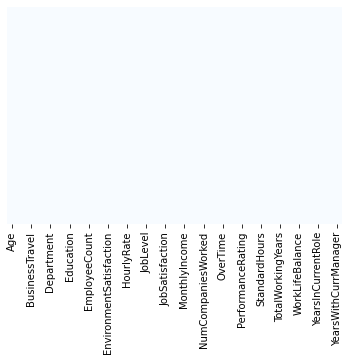

In [12]:
#Check for missing data using seaborn's heatmap
sns.heatmap(employee_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')
plt.show()

There are no missing data in this data set.

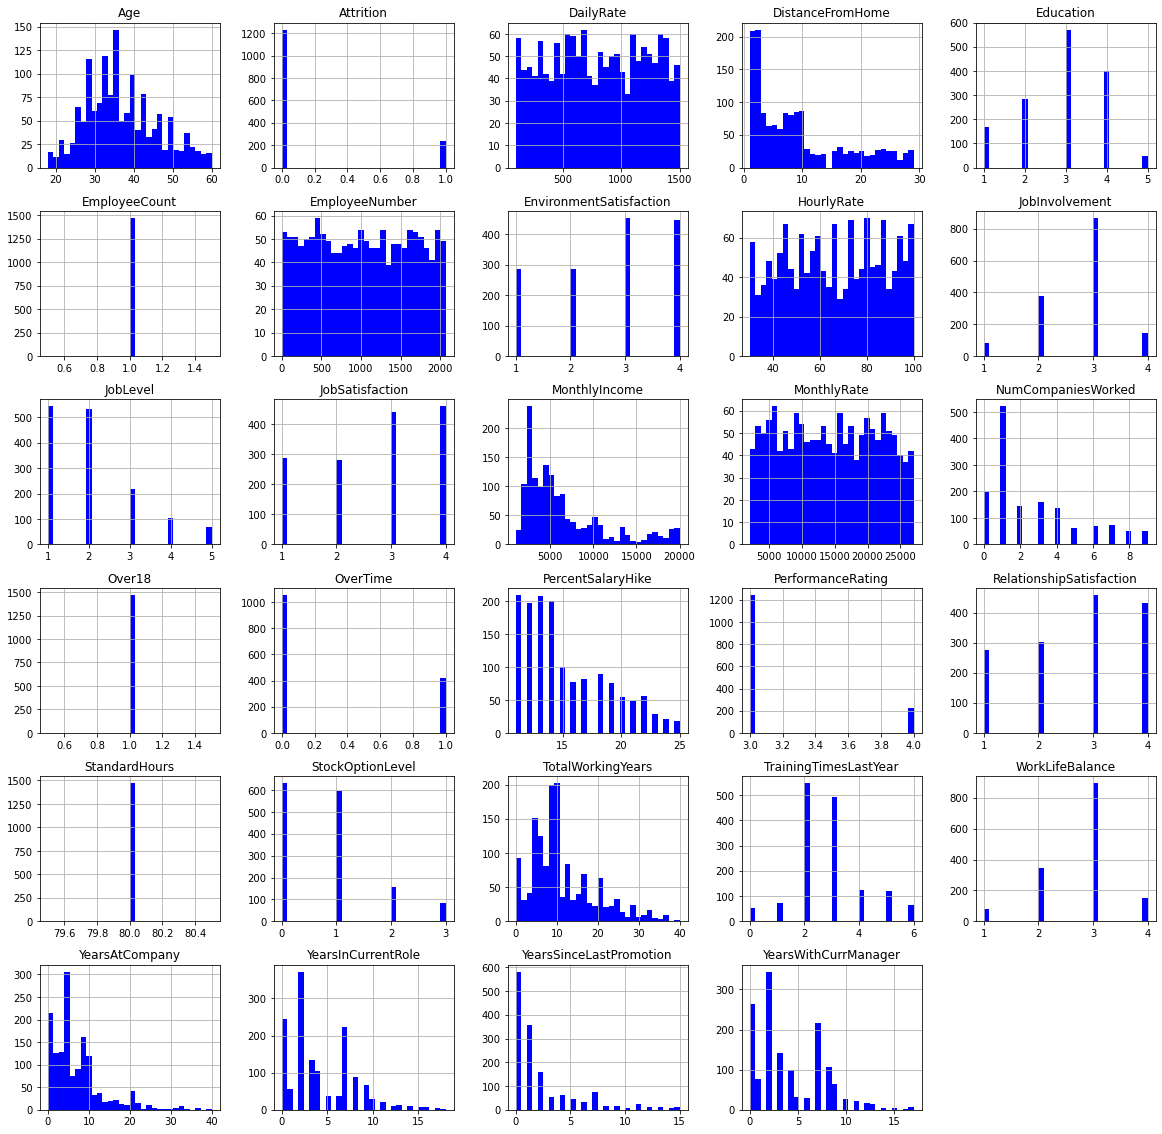

In [13]:
#Let's plot a histogram of the data and specify the bins and figure size
employee_df.hist(bins = 30, figsize = (20, 20), color = 'b')
plt.show()

Some observations from the histograms

Age: Majority of the employees are between age 30 - 40.

Attrition: Over 1200 employees ended up not leaving whereas a little over 200 employees left the organization

Daily Rate, Hourly Rate and Monthly Rates: Have no pattern.

Monthly Income: This is skewed. A large number of employees make up to 50k. After that at salary goes up Number of employees go down

Percent Salary Hike: This is also skewed. A lot of employees for a salary raise between 0-15%, very few employees got a raise above 15%

Total Working Years: Most of the employees are between 0-10 working years. Skewed

Years at the company: Most employees have a tenure of between 0-10 years.

Now Let's drop some features as from an employers perspective, they are not useful for making predictions.

In [14]:
#Drop the features: Employee Count, Over 18 (Always Y) , Standard hours(Fixed - 80) and Employee Numbers.
employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace = True)

In [15]:
#Check the shape to make sure the 4 features were dropped
employee_df.shape

(1470, 31)

Explore the employees that left the company

In [16]:
#Create two data frames for employees to stayed and who left and analyze the characteristics
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

In [17]:
#Take a Count of the total number of employees
print('Total = ', len(employee_df))
print('Number of employees who left = ', len(left_df))
print('% of employees who left = ', 1.*len(left_df)/len(employee_df) * 100, '%')

print('Number of employees who stayed = ', len(stayed_df))
print('% of employees who stayed = ', 1.*len(stayed_df)/len(employee_df) * 100, '%')


Total =  1470
Number of employees who left =  237
% of employees who left =  16.122448979591837 %
Number of employees who stayed =  1233
% of employees who stayed =  83.87755102040816 %


Quick Statistics below on the characteristics of employees who left

In [18]:
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


Mean age: employees who left - 33 years, employees who stayed - 37 years. Mean age of employees who stayed is higher than those who left.

Daily Rate: employees who left - 750, employees who stayed - 812. Mean Daily Rate of employees who stayed is higher than those who left.

Distance from Home: employees who left - 10km, employees who stayed - 8km. Employees who stayed live closer to home.

Environment Satisfaction & Job Satisfaction index: Employees who stayed are generally more stayed with their job/work environment.

stock Option Level: Employees who stayed tend to have higher stock option level.

Quick Statistics below on the characteristics of the employees who stayed

In [19]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [20]:
#Exploring Correlations
correlations = employee_df.corr()

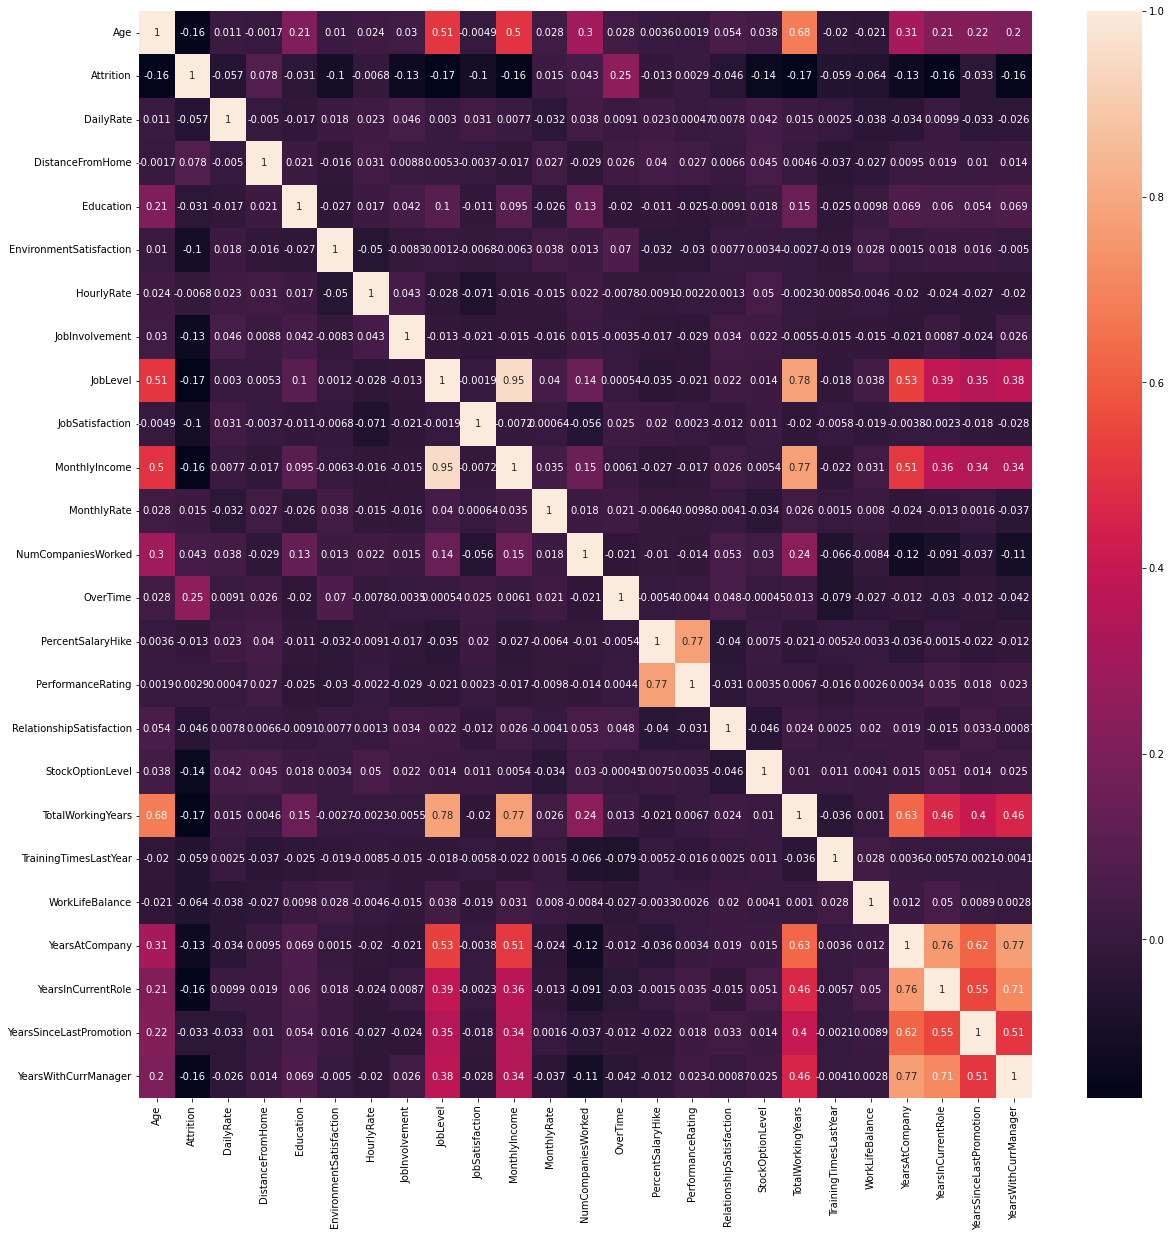

In [21]:
#Create a heatmap with the correlation matrix
fig, ax = plt.subplots(figsize = (20,20)) #Create figure and axis with specific size.
sns.heatmap(correlations, annot = True) # Create heatmap with annotations
plt.show()

Observations from the Correlation Matrix

Job level is highly correlated with total working hours - the more senior an individual is, the more number of hours an employee tend to work

Monthly income is strongly correlated with job level - the higher the job level is, the more the salary is.

Monthly income is also strongly correlated with total working hours.

Age is positively correlated with monthly income.

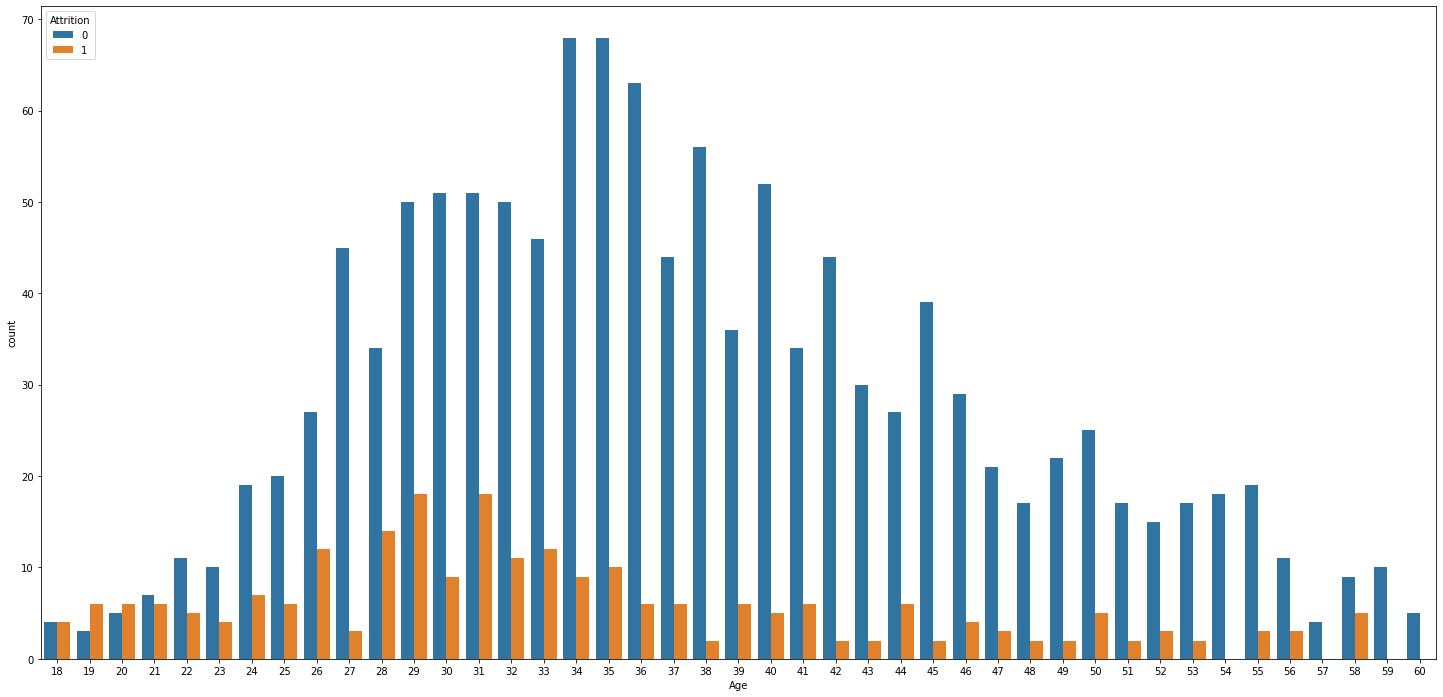

In [22]:
#Exploration of Age and Attrition
plt.figure(figsize = [25, 12]) #Create the figure size
sns.countplot(x = 'Age', hue = 'Attrition', data = employee_df) 
#Attrition 0 means employees stayed, 1 means employees left

plt.show()

Observations from the bar plot

At age 29 from a total of 50 employees stayed and 20 employees left. So attrition is highest between age 29 - 31. 

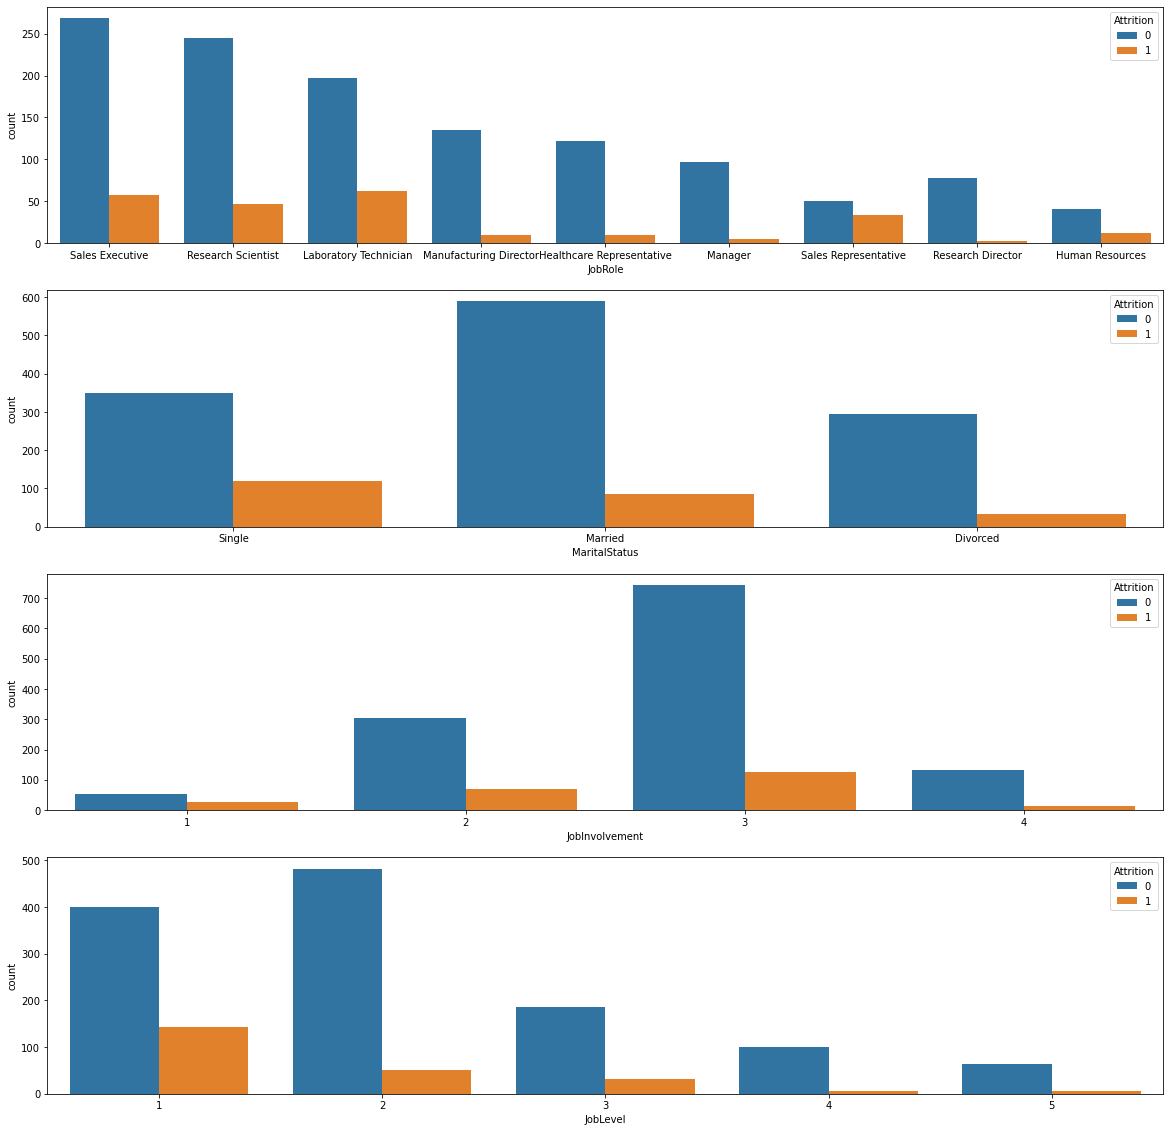

In [23]:
#Exploration for the Job Role, Marital Status and Job Involvement and Job Level
plt.figure(figsize = [20, 20]) #Setting up the figure size

plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = employee_df)

plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = employee_df)

plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = employee_df)

plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = employee_df)

plt.show()


First plot - Relationship between job role and attrition:
Sales Rep Job - Around 50 emplyees stayed - 40 left - meaning almost hald the team left - meaning high turnover
Research Director - Almost nobody left. 

Second Pliot - Marital status: Single employees tend to leave jobs a lot more.

Third plot - Job involved: People with low involvement percentage left the company.

Fourth Plot - Job Level: As people are more experience, it's highly unlikely that they will leave the company.

Let's plot some KDE plots. KDE plots is used for visualizing the probability Density of a continuous variable.

KDE describes the probability density at different values in continuous variable.

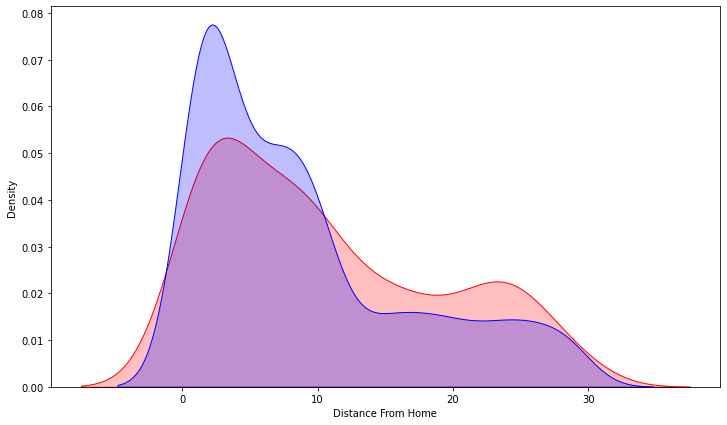

In [24]:
#Explore relationship between distance from home and attrition of employees
plt.figure (figsize = (12, 7))

#KDE Plot for Employees who left
sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees who left', shade = True, color = 'r')
#KDE Plot for Employees who stayed
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Distance From Home')
plt.show()


Observations from the KDE plots:
    
As distance goes up (x-axis), number of employees who left(Red line) is more than number of emmployees who stayed (Blue line)

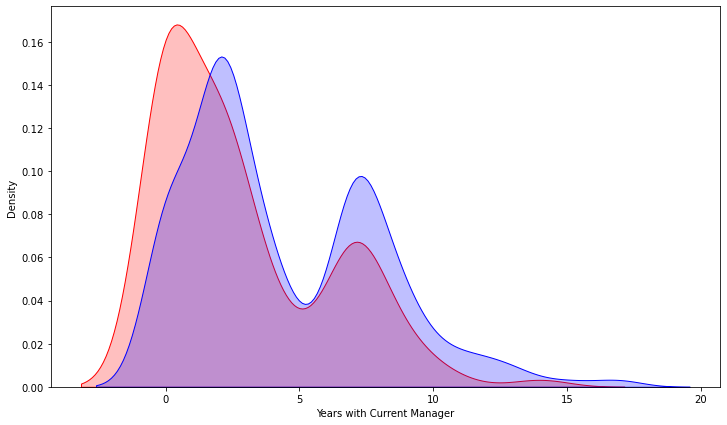

In [25]:
#Explore relationship between time with current manager and attrition of employees
plt.figure (figsize = (12, 7))

#KDE Plot for Employees who left
sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Employees who left', shade = True, color = 'r')
#KDE Plot for Employees who stayed
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Years with Current Manager')
plt.show()

Observations from the KDE plot:

From the plot, it seems that, employees tend to leave earlier within 5 years under one manager, after the 5 year period, employees tend to stay. 

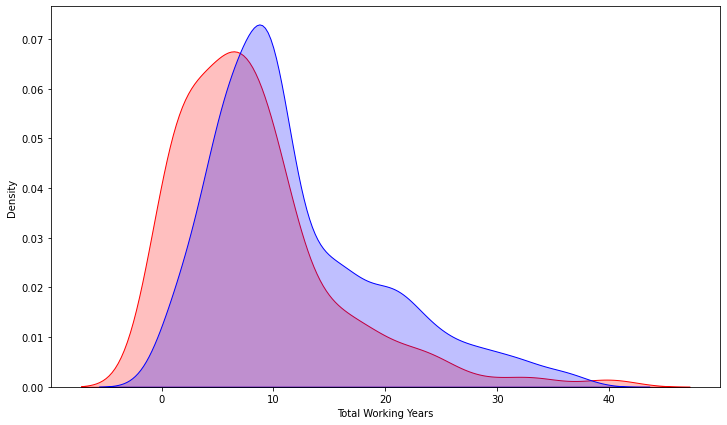

In [26]:
#Explore relationship between time with Total Working Years and attrition of employees
plt.figure (figsize = (12, 7))

#KDE Plot for Employees who left
sns.kdeplot(left_df['TotalWorkingYears'], label = 'Employees who left', shade = True, color = 'r')
#KDE Plot for Employees who stayed
sns.kdeplot(stayed_df['TotalWorkingYears'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Total Working Years')
plt.show()

Observations from the KDE plot:

It seems like employees tend to leave more within the first 10 years of their career, after which they tend to stay.

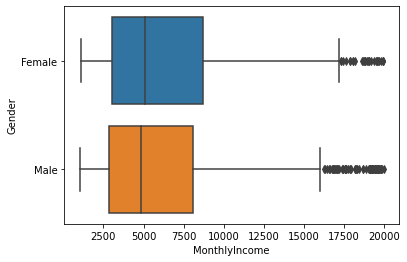

In [27]:
#Let's explore the relationship between Gender and Monthly Income using a Boxplot
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = employee_df)
plt.show()


Observations from the boxplot:

It seems like there isn't a signifcant monthly income gap between male and female employees.

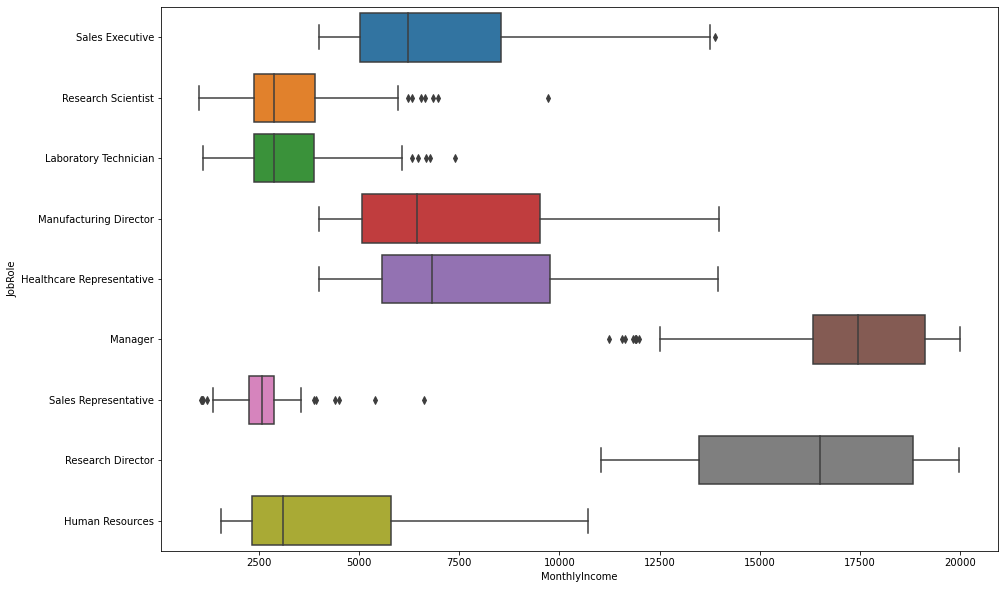

In [28]:
#Let's explore the relationship between Job Role and Monthly Income using a Boxplot
plt.figure(figsize = (15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = employee_df)
plt.show()

Observation from the boxplot:

Manager level employees make more compared to other titles.

Research directors make more compared to other titles too.

Sales representatives make a lot less compared to the other titles.

### Data Pre-processing

In [29]:
#Take all the categorical features and separate from the rest of the features

employee_df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0


In [30]:
#Create a data frame only for the categorial features
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]

In [31]:
X_cat.head(3)

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single


Encode the categorical features into numerical values using OneHotEncoder

In [32]:
#Encode the categorical information to numbers
from sklearn.preprocessing import OneHotEncoder

onehotencoder = OneHotEncoder() #instantiate one hot encoder

X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [33]:
X_cat.shape

(1470, 26)

In [34]:
#Convert the array of categorial features into a dataframe
X_cat = pd.DataFrame(X_cat)

In [35]:
X_cat.head(3)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [36]:
#Take the numerical Features and separate them from the rest of the data
X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome', 'Education', 
                           'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
                          'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
                           'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
                          'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
                          'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
                          'YearsWithCurrManager']]

In [37]:
X_numerical.shape

(1470, 24)

In [38]:
#Now combine the numerical and categorical features together and call it X_all

X_all = pd.concat([X_cat, X_numerical], axis = 1) #axis = 1 since we are combinging columns


In [39]:
X_all.head()

,0,1,2,3,4,5,6,7,8,9,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1,0,8,0,1,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,1,10,3,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2,0,7,3,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,0,8,3,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,4,1,6,3,3,3,2,2,2,2


Now let's scale the data because some of the features have a much larger range than other features. Without scaling the data, the features with the longest range will take over other features with short ranges.
Scale the data so that the ML models treat each features equally.

We use Min Max Scaler to transform the data set

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #Instantiate the MinMax Scaler
X = scaler.fit_transform(X_all) #Transform the data set

X is the array of data input that will be used for model development

In [41]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

The Target Feature 'Attrition' is saved in y

In [42]:
y = employee_df['Attrition']

In [43]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

### Model Development and Evaluation

Data is split into 75% training and 25% Testing

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [46]:
X_train.shape

(1102, 50)

In [47]:
X_test.shape

(368, 50)

#### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [49]:
#instantiate a logistic regression object
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [50]:
y_pred = model.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix, classification_report

In [52]:
print('Accuracy {} %'.format(100 * accuracy_score(y_pred, y_test)))

Accuracy 87.77173913043478 %


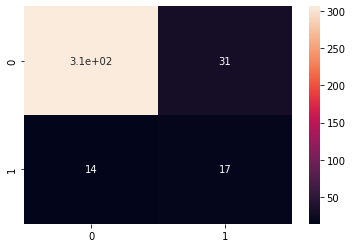

In [53]:
#plot confusion matrix
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)
plt.show()

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       320
           1       0.55      0.35      0.43        48

    accuracy                           0.88       368
   macro avg       0.73      0.66      0.68       368
weighted avg       0.86      0.88      0.87       368



Overall, Logistic regression is  predicting accurately with 88% accuracy.

Logistic regression achieved a precision of 91% on employees staying vs 55% on employees leaving.

Logistic regression achieved a recall of 93% on employees staying vs 43% on employees leaving.


#### Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
#instantiate Random Fore Classifier and Fit the data
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
y_pred = model.predict(X_test)

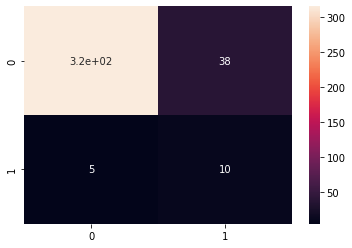

In [58]:
#plot confusion matrix
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)
plt.show()

In [59]:
print('Accuracy {} %'.format(100 * accuracy_score(y_pred, y_test)))

Accuracy 88.31521739130434 %


In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       320
           1       0.67      0.21      0.32        48

    accuracy                           0.88       368
   macro avg       0.78      0.60      0.63       368
weighted avg       0.86      0.88      0.86       368



Overall, Random Forest is predicting accurately with 88% accuracy.

Logistic regression achieved a precision of 89% on employees staying vs 67% on employees leaving.

Logistic regression achieved a recall of 98% on employees staying vs 21% on employees leaving.

#### Deep Learning - Artificial Neural Network (ANN): Sequential Neural Network

In [63]:
import tensorflow as tf

In [64]:
#Instantiate a Sequential Neural Network Model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu', input_shape = (50, ))) #Add the first layer
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu')) #Second Layer
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu')) #Third Layer
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid')) #output Layer - in this case, it's sigmoid as it's calssification (either 0 or 1)

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               25500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


Almost half a million parameters to Tune

In [66]:
#Compile the model by optimization

model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [67]:
#fit model into the training set and record the history in a variable
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50)

Epoch 1/100
23/23 [==============================] - 1s 6ms/step - loss: 0.4410 - accuracy: 0.8285
Epoch 2/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3852 - accuracy: 0.8430
Epoch 3/100
23/23 [==============================] - 0s 8ms/step - loss: 0.3598 - accuracy: 0.8575
Epoch 4/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3428 - accuracy: 0.8575
Epoch 5/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3187 - accuracy: 0.8657
Epoch 6/100
23/23 [==============================] - 0s 7ms/step - loss: 0.2873 - accuracy: 0.8902
Epoch 7/100
23/23 [==============================] - 0s 8ms/step - loss: 0.2657 - accuracy: 0.8893
Epoch 8/100
23/23 [==============================] - 0s 7ms/step - loss: 0.2311 - accuracy: 0.9047
Epoch 9/100
23/23 [==============================] - 0s 8ms/step - loss: 0.1843 - accuracy: 0.9256
Epoch 10/100
23/23 [==============================] - 0s 7ms/step - loss: 0.1431 - accuracy: 0.9492
Epoch 11/

23/23 [==============================] - 0s 6ms/step - loss: 1.1711e-05 - accuracy: 1.0000
Epoch 81/100
23/23 [==============================] - 0s 6ms/step - loss: 1.1207e-05 - accuracy: 1.0000
Epoch 82/100
23/23 [==============================] - 0s 6ms/step - loss: 1.0881e-05 - accuracy: 1.0000
Epoch 83/100
23/23 [==============================] - 0s 6ms/step - loss: 1.0484e-05 - accuracy: 1.0000
Epoch 84/100
23/23 [==============================] - 0s 6ms/step - loss: 1.0140e-05 - accuracy: 1.0000
Epoch 85/100
23/23 [==============================] - 0s 6ms/step - loss: 9.8385e-06 - accuracy: 1.0000
Epoch 86/100
23/23 [==============================] - 0s 6ms/step - loss: 9.5020e-06 - accuracy: 1.0000
Epoch 87/100
23/23 [==============================] - 0s 6ms/step - loss: 9.2235e-06 - accuracy: 1.0000
Epoch 88/100
23/23 [==============================] - 0s 6ms/step - loss: 8.9250e-06 - accuracy: 1.0000
Epoch 89/100
23/23 [==============================] - 0s 6ms/step - loss: 8.6

In [68]:
#Predictions
y_pred = model.predict(X_test)
#Set Threshold for the predictions
y_pred = (y_pred > 0.5)

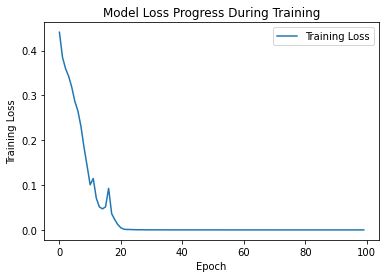

In [69]:
#Plot the Training loss
plt.plot(epochs_hist.history['loss']) #examine the loss function by calling the history method of the epoch
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])
plt.show()

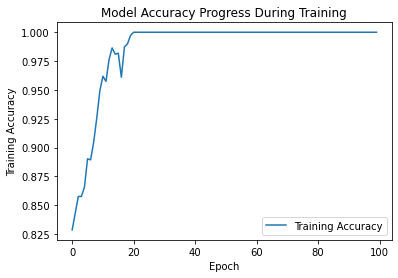

In [70]:
#Let's plot accuracy
plt.plot(epochs_hist.history['accuracy']) #examine the loss function by calling the history method of the epoch
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])
plt.show()

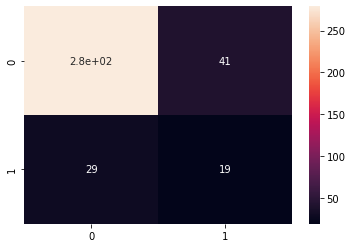

In [71]:
#Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.show()

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       320
           1       0.32      0.40      0.35        48

    accuracy                           0.81       368
   macro avg       0.61      0.63      0.62       368
weighted avg       0.83      0.81      0.82       368



Overall, ANN sequential Model is predicting with 81% overall accuracy.

ANN Sequential Model achieved a precision of 91% on employees staying vs 32% on employees leaving.

Logistic regression achieved a recall of 87% on employees staying vs 40% on employees leaving.

## Summary

Best Model in terms of predicting employees leaving:

Logistic Regression - 
Accuracy: 88%; 
Precision: 55%; 
Recall: 43%; 
    
Random Forest- 
Accuracy: 88%;
Precision: 67%;
Recall: 21%;
    
ANN Sequential Model - 
Accuracy: 81%;
Precision: 32%;
Recall: 40%
    
Based on the results, we conclude that Logistic regression is the best model as it is able to predict leaving employees with higher accuracy, precision and recall.